# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the questions below is worth 5 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Attempt each question*, even if you don't think you can solve it fully. 
### - *Comment* your code to explain what each part does. You will gain marks for well-commented code even if it does not exactly solve the problem. You can also lose marks for poorly commented code even if you get everything 100% correct.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### – Always label your plot axes and state the units.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

In [2]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt

## 1

In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

(a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that

$$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$

[Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

First we prove that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ by performing the matrix multiplication. The Pauli matrix $\hat{\sigma}_z$ is:
$$
    \hat{\sigma}_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}.
$$
Now, calculate $\hat{\sigma}_z^2$:
$$
    \hat{\sigma}_z^2 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \times \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} = \begin{pmatrix} 1^2 & 0 \\ 0 & (-1)^2 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \hat{\mathbb{1}}.
$$
Thus, $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$, the identity matrix. We now derive the matrix exponential $\hat{U}(t) = e^{-{i\omega \hat{\sigma}_z t}/2}$

Now, let’s calculate $e^{-i\omega \hat{\sigma}_z t/2}$. Using the Taylor expansion of the exponential function, we can write:
$$
e^{-{i\omega \hat{\sigma}_z t/2}} = \sum_{n=0}^\infty \frac{\left(-\frac{i\omega \hat{\sigma}_z t}{2}\right)^n}{n!}.
$$

Since $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$, we can simplify powers of $\hat{\sigma}_z$. Notice that:
$$
\hat{\sigma}_z^2 = \hat{\mathbb{1}},
\hat{\sigma}_z^3 = \hat{\sigma}_z,
\hat{\sigma}_z^4 = \hat{\mathbb{1}}, 
$$
and so on. Thus, odd powers of $\hat{\sigma}_z$ will give $\hat{\sigma}_z$, and even powers will give $\hat{\mathbb{1}}$. Let’s separate the sum into even and odd terms.
For the even terms (for $n = 2m$):
$$
    \sum_{m=0}^\infty \frac{\left(-\frac{i\omega t}{2}\right)^{2m}}{(2m)!} \hat{\sigma}_z^{2m} = \sum_{m=0}^\infty \frac{\left(\frac{i\omega t}{2}\right)^{2m}}{(2m)!} \hat{\mathbb{1}} = \cos\left(\frac{\omega t}{2}\right) \hat{\mathbb{1}}.
$$
For the odd terms (for $n = 2m+1$):
$$
    \sum_{m=0}^\infty \frac{\left(-\frac{i\omega t}{2}\right)^{2m+1}}{(2m+1)!} \hat{\sigma}_z^{2m+1} = \sum_{m=0}^\infty \frac{\left(\frac{i \omega t}{2}\right)^{2m+1}}{(2m+1)!} (-1) \hat{\sigma}_z = -i \sin\left(\frac{\omega t}{2}\right) \hat{\sigma}_z.
$$
We can put the results together by combining the sums. To which we get:
$$
e^{-{i\omega \hat{\sigma}_z t / 2}} = \cos\left(\frac{\omega t}{2}\right) \hat{\mathbb{1}} - i \sin\left(\frac{\omega t}{2}\right) \hat{\sigma}_z.
$$
as expected.

In [3]:
# Define the Pauli matrices as np arrays
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Define sigma as an array of np arrays
sigma = np.array([sigma_x, sigma_y, sigma_z])

In [9]:
# Define the Hamiltonian as a function
def H(h_omega: float, unitary_v: np.array):
    ''' Returns the Hamiltonian of the system given the omega frequency and the unitary vector v'''
    return (h_omega*0.5)*np.tensordot(unitary_v, sigma, axes=(0, 0)).astype(np.complex128)

(b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the typed lecture notes ([see Blackboard](https://tcd.blackboard.com)). Convince yourself that the anti-commutation relation

$$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$

holds for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
commutation and anti-commutation relations (or otherwise), verify the identity:

$$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  

where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.

(c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that

$$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$

Use this result to show that, in general,

$$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$

Now we prove the more general case where $\mathbf{u} = (u_x, u_y, u_z)$. We fist prove  that $(\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = \hat{\mathbb{1}}$. We start with the general qubit Hamiltonian:
$$
    \hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}},
$$
where $ \mathbf{u} = (u_x, u_y, u_z)$ is a unit vector, meaning that $ \lVert \mathbf{u} \rVert = 1 $ and $\hat{\boldsymbol{\sigma}} = (\hat{\sigma}_x, \hat{\sigma}_y, \hat{\sigma}_z)$ are the Pauli matrices.

Now, compute $ (\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 $
$$
    (\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = (u_x \hat{\sigma}_x + u_y \hat{\sigma}_y + u_z \hat{\sigma}_z)^2.
$$

Using the properties of Pauli matrices:
- $ \hat{\sigma}_i^2 = \hat{\mathbb{1}}$ for $ i = x, y, z $
- $\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}} $

we have:
$$
    (\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = u_x^2 \hat{\sigma}_x^2 + u_y^2 \hat{\sigma}_y^2 + u_z^2 \hat{\sigma}_z^2 
+ u_x u_y \left( \hat{\sigma}_x \hat{\sigma}_y + \hat{\sigma}_y \hat{\sigma}_x \right) 
+ u_x u_z \left( \hat{\sigma}_x \hat{\sigma}_z + \hat{\sigma}_z \hat{\sigma}_x \right) 
+ u_y u_z \left( \hat{\sigma}_y \hat{\sigma}_z + \hat{\sigma}_z \hat{\sigma}_y \right)
$$
Since $\hat{\sigma}_x^2 = \hat{\sigma}_y^2 = \hat{\sigma}_z^2 = \hat{\mathbb{1}}$ and the cross terms involve products of Pauli matrices that give zero due to their anticommuting properties, we get:
$$
    (\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = (u_x^2 + u_y^2 + u_z^2)\hat{\mathbb{1}}.
$$
Since $ \lVert \mathbf{u} \rVert^2 = u_x^2 + u_y^2 + u_z^2 = 1 $ we have:
$$
    (\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = \hat{\mathbb{1}}.
$$
Haven proven the above is a straight forward prove to show that $\hat{H}^2 = \left(\frac{\hbar \omega}{2}\right)^2 \hat{\mathbb{1}}$:
$$
    \hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}},
$$
so,
$$
    \hat{H}^2 = \left(\frac{\hbar \omega}{2}\right)^2 (\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = \left(\frac{\hbar \omega}{2}\right)^2 \hat{\mathbb{1}}.
$$
as expected.

To derive the general expression for the time evolution operator $\hat{U}(t) = e^{-i \hat{H} t / \hbar}$, where $\hat{H} = \frac{\hbar \omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}} $, we can use the same approach as we did for the case of $\hat{\sigma}_z$. The steps are as follows:

1. **Expand the Time Evolution Operator**: Start by expanding $\hat{U}(t)$ using the Taylor series for the matrix exponential.
2. **Group by Even and Odd Terms**: Next, separate the expansion into even and odd terms. The even terms correspond to powers of $\hat{H}$ that yield contributions to the identity operator, while the odd terms will involve products of the Pauli matrices:
   - **Even terms**: These involve $\hat{H}^{2n}$ which, due to the identity $(\mathbf{u} \cdot \hat{\boldsymbol{\sigma}})^2 = \hat{\mathbb{1}}$, will contribute to $\hat{\mathbb{1}}$ when summed.
   - **Odd terms**: These involve $\hat{H}^{2n+1}$ and will be expressed as $-\hat{H}$ multiplied by the even terms.
3. **Verify the Taylor Series for Sin and Cos**: Recognize that the even and odd terms in the expansion correspond to the Taylor series for cosine and sine.
4. **Combine the Results**: Finally, combine these results to express the time evolution operator.
By following these steps, we have shown that the general time evolution operator for the Hamiltonian can be expressed in a form as: 
$$
    \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}
$$

(d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:

$$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$

Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. 

In order to find the sigma z operator in the Heisenberg picture is enough to perform the matrix multiplication $\hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t)$. First, we find the matrix form of the unitary time evolution operator using the value of $\mathbf{u} = (1,1,0)/\sqrt{2}$ and the expression $ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$ for which we get:
$$
    \hat{U}(t) = \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}} \\[10px] 
        = \cos\left(\frac{\omega t}{2}\right) \hat{\mathbb{1}} - {\rm i} \sin\left(\frac{\omega t}{2}\right) 
            \begin{pmatrix}
            0 & \frac{1-i}{\sqrt{2}} \\
            \frac{1+i}{\sqrt{2}} & 0 \\
            \end{pmatrix} \\[10px]
        =   \begin{pmatrix}
                \cos[\omega t/2] & -\frac{1+i}{\sqrt{2}}\sin[\omega t/2] \\
                \frac{1-i}{\sqrt{2}}\sin[\omega t/2] & \cos[\omega t/2] \\
            \end{pmatrix} \\[10px]
$$
And therefore
$$
    \begin{equation} \tag{1.2}
    \hat{U}(t) = \begin{pmatrix}
                \cos[\omega t/2] & -\frac{1+i}{\sqrt{2}}\sin[\omega t/2] \\
                \frac{1-i}{\sqrt{2}}\sin[\omega t/2] & \cos[\omega t/2] \\
            \end{pmatrix} \\[10px]
    \end{equation}
$$
By taking the complex conjugate of the above matrix we find that
$$
    \begin{equation} \tag{1.2}
    \hat{U}(t)^\dagger = \begin{pmatrix}
                \cos[\omega t/2] & \frac{1+i}{\sqrt{2}}\sin[\omega t/2] \\
                -\frac{1-i}{\sqrt{2}}\sin[\omega t/2] & \cos[\omega t/2] \\
            \end{pmatrix} \\[10px]
    \end{equation}
$$
We now form the product: 
$$
    \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t) \\[10px]
        = \begin{pmatrix}
                \cos[\omega t/2] & \frac{1+i}{\sqrt{2}}\sin[\omega t/2] \\
                -\frac{1-i}{\sqrt{2}}\sin[\omega t/2] & \cos[\omega t/2] \\
            \end{pmatrix}
            \begin{pmatrix}
                1 & 0 \\
                0 & -1 \\
            \end{pmatrix}
            \begin{pmatrix}
                \cos[\omega t/2] & -\frac{1+i}{\sqrt{2}}\sin[\omega t/2] \\
                \frac{1-i}{\sqrt{2}}\sin[\omega t/2] & \cos[\omega t/2] \\
            \end{pmatrix} \\[10px]
        = \begin{pmatrix}
                \cos[\omega t/2] & -\frac{1+i}{\sqrt{2}}\sin[\omega t/2] \\
                \frac{1-i}{\sqrt{2}}\sin[\omega t/2] & \cos[\omega t/2] \\
            \end{pmatrix} \\[10px]
$$

## 2
Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,2,0)/\sqrt{5}$. 

(a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [5]:
# Define the unitary vector
u = 1/np.sqrt(5)*np.array([1,2,0])
# Define the dimension less quantity h_omega
h_omega = 0.2
# Just print the values to see what we have
print("Unitary vector u: \n", u)
print("H Omega: \n", h_omega)

Unitary vector u: 
 [0.4472136  0.89442719 0.        ]
H Omega: 
 0.2


In [11]:
# Compute the hamiltonian using the H function
h_1 = H(h_omega, u)
print('Found H_1 to be: \n:', h_1)
# Compute the square value of the Hamiltonian
h_square = np.dot(h_1, h_1)
print('Hamiltonian square is: \n', h_square)
print('Which is the same as the identity matrix I times (hw/2)**2 which is: ', (h_omega/2)**2)

Found H_1 to be: 
: [[0.        +0.j         0.04472136-0.08944272j]
 [0.04472136+0.08944272j 0.        +0.j        ]]
Hamiltonian square is: 
 [[0.01+0.j 0.  +0.j]
 [0.  +0.j 0.01+0.j]]
Which is the same as the identity matrix I times (hw/2)**2 which is:  0.010000000000000002


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [12]:
# Initial state |down> (|ψ(0)>)
down = np.array([0,1])
# Verify that down is not an eigenvector
h_psi_0 = np.dot(h_1, down)
# Print the result
print("H|ψ(0)⟩: \n", h_psi_0)
# Check if h_psi_0 is proportional to psi_0 (it should not be)
# If proportional, there would be a constant factor relating them (this won't happen)
if np.allclose(h_psi_0, down):
    print("|ψ(0)> is an eigenstate.")
else:
    print("|ψ(0)> is NOT an eigenstate.")
# Find the eigenvalues and eigenvectors of the system using eig fuc
values, vectors = np.linalg.eig(h_1)
print("The true eigenvalues for H are: ", values)
print("The true eigenvectors for H are: ", vectors)

H|ψ(0)⟩: 
 [0.04472136-0.08944272j 0.        +0.j        ]
|ψ(0)> is NOT an eigenstate.
The true eigenvalues for H are:  [ 0.1+3.46944695e-18j -0.1-3.46944695e-18j]
The true eigenvectors for H are:  [[ 0.31622777-0.63245553j -0.31622777+0.63245553j]
 [ 0.70710678+0.j          0.70710678+0.j        ]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [13]:
def U_delta_t(delta_t: float):
        ''' Compute the time evolution operator function for the delta interval U(Δt) = exp(-i H Δt / h_bar). For simplicity set h=1'''
        return scipy.linalg.expm(-1j * (h_1 * delta_t ))

In [15]:
# Define the delta time step
delta_t = 0.05
# Compute the delta unitary time evolution
U_delta = U_delta_t(0.05)
# U^dagger is the conjugate transpose of U
U_dagger = np.conjugate(U_delta.T)
identity_matrix = np.dot(U_delta, U_dagger)
# Round the result of the matrix to account for numerical errors
rounded_identity = np.round(identity_matrix, decimals=15)
# Verify unitarity: U^dagger * U should equal the identity matrix
print("U^dagger * U: \n", rounded_identity)
# Check if the result is close to the identity matrix
print("U(Δt) is unitary.") if np.allclose(rounded_identity, np.eye(2)) else print("U(Δt) is NOT unitary.")

U^dagger * U: 
 [[1.+0.j 0.+0.j]
 [0.-0.j 1.+0.j]]
U(Δt) is unitary.


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

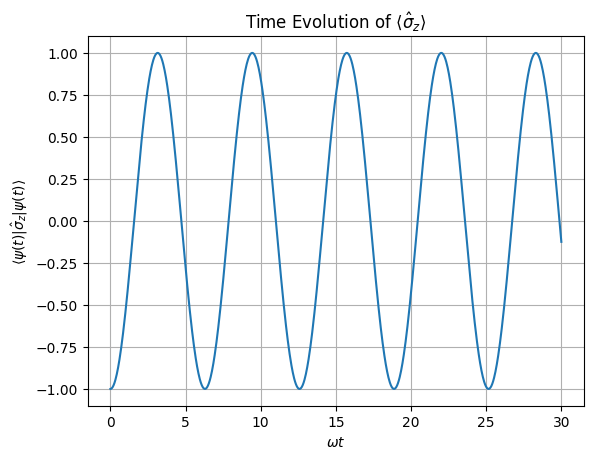

In [17]:
# Define N, t_max and the step Δt
N = 1000 # The amount of steps, the more steps the more detail the graph
omega = 0.2 # Set omega to 0.2 since we have set h = 1 for convenience
t_max = 30 / omega  # Maximum time corresponding to ω t = 30
delta_t = t_max / N  # Time step Δt

# Initialize the state and time array
psi_t = down
# Compute the time as a linspace of size N
times = np.linspace(0, t_max, N)
# Will hold the expectation value of sigma z at time delta t
sigma_z_expectation = np.zeros(N)

# Loop over each time step
for n in range(N):
    # Compute expectation value ⟨σ_z⟩
    sigma_z_expectation[n] = np.vdot(psi_t, np.dot(sigma_z, psi_t)).real
    # Evolve the state to the next time step using the discrete time evolution operator
    psi_t = np.dot(U_delta_t(delta_t), psi_t)

# Plot the result
plt.plot(omega * times, sigma_z_expectation)
plt.xlabel(r'$\omega t$')
plt.ylabel(r'$\langle \psi(t) | \hat{\sigma}_z | \psi(t) \rangle$')
plt.title(r'Time Evolution of $\langle \hat{\sigma}_z \rangle$')
plt.grid(True)
plt.show()

## 3
Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

(a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation

$$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$

where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.



When $\mathbf{u} = (0, 1, 0)$, the equations simplify, leading to a rotation around the $y$-axis of the Bloch sphere. The vector $\mathbf{s}$ will trace a circular path in the $x-z$ plane.
![Alt text](map.jpg)

To derive the equation of motion for the Bloch vector $\mathbf{s}$, we start with its definition:
$$
   \mathbf{s} = (s_x, s_y, s_z) = \left(\langle \hat{\sigma}_x \rangle, \langle \hat{\sigma}_y \rangle, \langle \hat{\sigma}_z \rangle\right),
$$
where $\langle \bullet \rangle = \langle \psi(t)| \bullet |\psi(t) \rangle$ represents the expectation value of the corresponding Pauli matrices with respect to the time-dependent state of the qubit.

Recall that the Heisenberg Equations of Motion, the time evolution of an observable $\hat{A}$ is given by the equation:
$$
   \dot{\hat{A}} = \frac{i}{\hbar}[\hat{H}, \hat{A}] + \frac{\partial \hat{A}}{\partial t}.
$$
In our case, since the Pauli matrices do not have explicit time dependence, we have:
$$
   \begin{equation} \tag{3.1}
      \dot{\hat{\sigma}}_i = \frac{i}{\hbar}[\hat{H}, \hat{\sigma}_i],
   \end{equation}
$$
where $i$ can be wither $x, y$, or $z$.
We now compute this expression by computing the commutators. Let us start by substituting the Hamiltonian $\hat{H} = \frac{\hbar \omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$ into the commutation relation 3.1:
$$
   \begin{equation} \tag{3.2}
      \dot{\hat{\sigma}}_i = \frac{i}{\hbar}\left[ \frac{\hbar \omega}{2}(u_x \hat{\sigma}_x + u_y \hat{\sigma}_y + u_z \hat{\sigma}_z), \hat{\sigma}_i \right]
   \end{equation}
$$
we can compute the commutators for the Pauli matrices:

1. **For $i = x$**:
   $$
   [\hat{H}, \hat{\sigma}_x] 
   = \frac{\hbar \omega}{2} \left(u_x [\hat{\sigma}_x, \hat{\sigma}_x] + u_y [\hat{\sigma}_y, \hat{\sigma}_x] + u_z [\hat{\sigma}_z, \hat{\sigma}_x]\right) 
   = \frac{\hbar \omega}{2} \left(0 + u_y 2i \epsilon_{yxz} \hat{\sigma}_z + u_z 2i \epsilon_{zxy} \hat{\sigma}_y \right).
   $$

   Thus, we have:
   $$
   [\hat{H}, \hat{\sigma}_x] = -i \hbar \omega \left( u_y \hat{\sigma}_z - u_z \hat{\sigma}_y \right)
   $$

2. **For $i = y$**:
   $$
   [\hat{H}, \hat{\sigma}_y] 
   = \frac{\hbar \omega}{2} \left(u_x [\hat{\sigma}_x, \hat{\sigma}_y] + u_y [\hat{\sigma}_y, \hat{\sigma}_y] + u_z [\hat{\sigma}_z, \hat{\sigma}_y]\right) 
   = \frac{\hbar \omega}{2} \left(u_x 2i \epsilon_{xyz} \hat{\sigma}_z + 0 + u_z 2i \epsilon_{zyx} \hat{\sigma}_x \right).
   $$

   Thus, we have:
   $$
   [\hat{H}, \hat{\sigma}_y] = -i \hbar \omega \left( u_z \hat{\sigma}_x - u_x \hat{\sigma}_z \right)
   $$

3. **For $i = z$**:
   $$
   [\hat{H}, \hat{\sigma}_z] 
   = \frac{\hbar \omega}{2} \left(u_x [\hat{\sigma}_x, \hat{\sigma}_z] + u_y [\hat{\sigma}_y, \hat{\sigma}_z] + u_z [\hat{\sigma}_z, \hat{\sigma}_z]\right) 
   = \frac{\hbar \omega}{2} \left(u_x 2i \epsilon_{xzy} \hat{\sigma}_y + u_y 2i \epsilon_{yzx} \hat{\sigma}_x + 0\right).
   $$

   Thus, we have:
   $$
   [\hat{H}, \hat{\sigma}_z] = -i \hbar \omega \left( u_x \hat{\sigma}_y - u_y \hat{\sigma}_x \right)
   $$

We now combine the results to Derive $\dot{\mathbf{s}}$. Now, substituting these commutators back into the equation 3.2 for $dot{\hat{\sigma}}_i$ we get:
1. **For $s_x$**:
   $$
   \dot{s}_x = \langle \dot{\hat{\sigma}}_x \rangle 
      = \omega \left(u_y \hat{s}_z - u_z \hat{s}_y \right)
   $$

2. **For $s_y$**:
   $$
   \dot{s}_y = \langle \dot{\hat{\sigma}}_y \rangle 
   = \omega \left( u_z \hat{s}_x - u_x \hat{s}_z \right)
   $$

3. **For $s_z$**:
   $$
   \dot{s}_z = \langle \dot{\hat{\sigma}}_z \rangle
   = \omega \left( u_x \hat{s}_y - u_y \hat{s}_x \right).
   $$

We can we that this vector matches the definition for cross product and therefore we can combining all the results which gives us the equation of motion for the Bloch vector:
$$
   \mathbf{\dot{s}} = \omega \, \mathbf{u} \times \mathbf{s},
$$
where $\mathbf{u} = (u_x, u_y, u_z)$ and $\times$ denotes the vector cross product.

(b) Show that the same equation can be expressed in the form

$$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$

and find an explicit expression for the matrix $\mathbf{M}$.

Assume such a matrix exist then it must satisfy:
$$
   \omega \begin{pmatrix}
    u_y \hat{s}_z - u_z \hat{s}_y\\
     u_z \hat{s}_x - u_x \hat{s}_z\\
     u_x \hat{s}_y - u_y \hat{s}_x
    \end{pmatrix} = \mathbf{M}\cdot \mathbf{s}
$$
From the given equations, we can see that the matrix $\mathbf{M}$ will be a $3 \times 3$ matrix with each element defined based on the coefficients of $\hat{s}_x$, $\hat{s}_y$, and $\hat{s}_z$ in each equation. We now found each elements of $\mathbf{M}$

1. For the first component:
   $$
   \omega (u_y \hat{s}_z - u_z \hat{s}_y) = M_{11} \hat{s}_x + M_{12} \hat{s}_y + M_{13} \hat{s}_z
   $$
   This implies:
   $$
   M_{11} = 0, \quad M_{12} = -\omega u_z, \quad M_{13} = \omega u_y
   $$

2. For the second component:
   $$
   \omega (u_z \hat{s}_x - u_x \hat{s}_z) = M_{21} \hat{s}_x + M_{22} \hat{s}_y + M_{23} \hat{s}_z
   $$
   This implies:
   $$
   M_{21} = \omega u_z, \quad M_{22} = 0, \quad M_{23} = -\omega u_x
   $$

3. For the third component:
   $$
   \omega (u_x \hat{s}_y - u_y \hat{s}_x) = M_{31} \hat{s}_x + M_{32} \hat{s}_y + M_{33} \hat{s}_z
   $$
   This implies:
   $$
   M_{31} = -\omega u_y, \quad M_{32} = \omega u_x, \quad M_{33} = 0
   $$

We can now const the Matrix $\mathbf{M}$. Putting it all together, we get:
$$
\mathbf{M} = \begin{pmatrix}
   0 & -\omega u_z & \omega u_y \\
   \omega u_z & 0 & -\omega u_x \\
   -\omega u_y & \omega u_x & 0
\end{pmatrix}
$$
or
$$
\mathbf{M} = \omega \begin{pmatrix}
   0 & -u_z & u_y \\
   u_z & 0 & -u_x \\
   -u_y & u_x & 0
\end{pmatrix}
$$ 

This matrix structure shows that the time evolution of the Bloch vector is governed by the components of the unit vector $\mathbf{u}$ and the angular frequency $\omega$.

In [18]:
def M(omega: float, unitary: np.array):
    ''' Define the matrix M given the unitary vector U '''
    return omega * np.array([
        [0, -unitary[2], unitary[1]],
        [unitary[2], 0, -unitary[0]],
        [-unitary[1], unitary[0], 0]])

(c) Convince yourself that the explicit solution of the above equation is 

$$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$

Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

In [19]:
# Compute the M matrix for the unitary vector u
M_matrix = M(omega, u)
print("M matrix for the unitary vector of exercise 2: ", M_matrix)

def S(delta_t: float, s: np.array):
    '''Compute the evolution of the block vector in time step Δt'''
    return np.dot(scipy.linalg.expm(M_matrix * delta_t), s)

M matrix for the unitary vector of exercise 2:  [[ 0.         -0.          0.17888544]
 [ 0.          0.         -0.08944272]
 [-0.17888544  0.08944272  0.        ]]


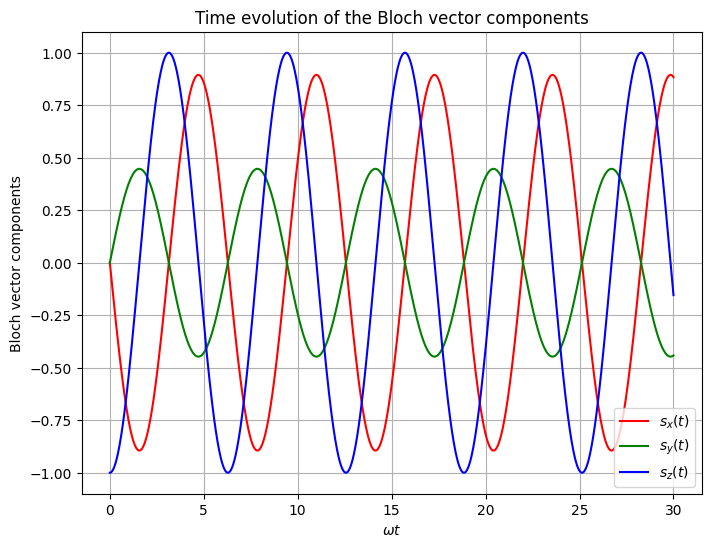

In [20]:
# Initial condition: Bloch vector
s = np.array([0, 0, -1])  # Initial state |down⟩ in Bloch vector form

#Evolves the Bloch vector using matrix exponential method
s_t = np.zeros((N+1, 3))  # Store the Bloch vector at each time step for the x,y,z
s_initial = s
s_t[0] = s_initial

# Iterate over the elements
for n in range(N):
    # Evolve the Bloch vector
    s_t[n+1] = S(delta_t,  s_t[n])

# Convert to NumPy array for easier plotting
# Extract the x, y, z components of the Bloch vector
s_x = s_t[:, 0]
s_y = s_t[:, 1]
s_z = s_t[:, 2]

time = np.linspace(0, t_max, N+1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(time * omega, s_x, label='$s_x(t)$', color='r')
plt.plot(time * omega, s_y, label='$s_y(t)$', color='g')
plt.plot(time * omega, s_z, label='$s_z(t)$', color='b')
plt.xlabel('$\omega t$')
plt.ylabel('Bloch vector components')
plt.title('Time evolution of the Bloch vector components')
plt.legend()
plt.grid(True)
plt.show()

## 4
A driven two-level system is described in the interaction picture by the Hamiltonian (within the rotating-wave approximation)

$$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. 

(a) Write down this Hamiltonian as a $2\times 2$ matrix and derive analytical expressions for its eigenvalues. 

We can get the 2 x 2 matrix for the interaction Hamiltonian by just performing the following matrix multiplication:
$$ 
M = \frac{\hbar \Delta}{2}\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
+ \frac{\hbar \Omega}{2}
\left(
\sin(\varphi)
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
- \cos(\varphi)
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\right)
\\[10px]
= \frac{\hbar}{2}\begin{pmatrix}
\Delta & \Omega \left( i \cos(\varphi) + \sin(\varphi) \right) \\
=\Omega \left( -i \cos(\varphi) + \sin(\varphi) \right) & -\Delta
\end{pmatrix}
\\[10px]
= \frac{\hbar}{2}
\begin{pmatrix}
    \Delta & \Omega i e^{-i\varphi} \\
    -\Omega i e^{i\varphi} & -\Delta
\end{pmatrix}
$$
Where we have used the fact that $-i \cos(x) + \sin(x) = -i e^{i x}$ and $i \cos(x) + \sin(x) = i e^{-i x}$. And therefore we get:
$$ 
\begin{equation} \tag{4.1}
M = \frac{\hbar}{2}
    \begin{pmatrix}
    \Delta & \Omega i e^{-i\varphi} \\
    -\Omega i e^{i\varphi} & -\Delta
    \end{pmatrix} 
\end{equation}
$$
To find the eigenvalues of the M matrix we can just. it is enough to solve for the equation $\det(M-\lambda I) = 0$:
$$
\begin{equation} \tag{4.2}
 A = M - \lambda I = 
\begin{pmatrix} 
    \frac{h \Delta}{2} - \lambda & \frac{h}{2} \Omega i e^{-i \varphi} \\
    -\frac{h}{2} \Omega i e^{i \varphi} & -\frac{h \Delta}{2} - \lambda
\end{pmatrix}
\end{equation}
$$
We now compute the $det(A)$:
$$
det(A) = -\frac{1}{4} h^2 \Delta^2 + \lambda^2 - \frac{h^2 \Omega^2}{4} 
$$
From which we can find the eigenvalues by equating the last equation to zero and solving for $\lambda$ to which we get:
$$
\begin{equation} \tag{4.3}
\lambda_{\pm} = \pm \frac{1}{2} h \sqrt{\Delta^2 + \Omega^2}
\end{equation}
$$


(b) Show that its two energy eigenvectors $|\chi_\pm\rangle$ can be written in the form 
$$ |\chi_+\rangle = \cos\alpha |\uparrow\rangle - {\rm ie}^{{\rm i}\varphi}\sin\alpha |\downarrow\rangle, \qquad |\chi_-\rangle = \cos\alpha |\downarrow\rangle - {\rm ie}^{-{\rm i}\varphi}\sin\alpha |\uparrow\rangle,$$
where $\tan 2\alpha = \Omega/\Delta$.

First let us find the eigenvector of M and derive a wat to express them as the above equations. Recall that to find the eigenvectors of M, the eigenvectors must satisfy:
$$
    N(M-\lambda I)
$$
We previously know the value of $M-\lambda I$ from equation 4.2. We therefore need to find the vector $v = [\psi_{1}, \psi_{2}]$ such that:
$$
\begin{pmatrix} 
    \frac{h \Delta}{2} - \lambda & \frac{h}{2} \Omega i e^{-i \varphi} \\
    -\frac{h}{2} \Omega i e^{i \varphi} & -\frac{h \Delta}{2} - \lambda
\end{pmatrix} \begin{pmatrix} 
    \psi_{1} \\ 
    \psi_{2} 
\end{pmatrix}= 0
$$
We can immediately get ride of the $h/2$ term and get:
$$
\begin{pmatrix} 
    \Delta - (\pm \sqrt{\Delta^2 + \Omega^2}) & \Omega i e^{-i \varphi} \\
    -\Omega i e^{i \varphi} & -(\Delta \pm \sqrt{\Delta^2 + \Omega^2}))
\end{pmatrix} \begin{pmatrix} 
    \psi_{1} \\ 
    \psi_{2} 
\end{pmatrix}= 0
$$
For where we get the pair of equations:
$$
(\Delta - (\pm \sqrt{\Delta^2 + \Omega^2}))\psi_{1} + \Omega i e^{-i \varphi}\psi_{2} = 0
\\[10px]
-(\Delta \pm \sqrt{\Delta^2 + \Omega^2})\psi_{2} - \Omega i e^{i \varphi}\psi_{1} = 0
$$
Let us now find an expression for $\psi_{2}$ in terms of $\psi_{1}$ and using $\lambda = \lambda_{+}$ from the first equation we find that:
$$
    \begin{equation} \tag{4.4}
    \psi_{2} = -i e^{i \varphi} \left[\frac{\sqrt{\Delta^2 + \Omega^2} - \Delta}{\Omega}\right]\psi_{1}
    \end{equation}
$$
We know that the eigenvector must be normalized and therefore satisfy:
$$
    \begin{equation} \tag{4.5}
        |\psi_{1}|^2 + |\psi_{2}|^2 = 1
    \end{equation}
$$
We know from the expression for $\psi_{2}$ that $\psi_{2}$ is proportional to $\psi_{1}$ by a factor, let's call it $k$ and therefore $\psi_{1} = k \psi_{2}$. By plugin this expression into the above equation we can derive the following relation:
$$
    \begin{equation} \tag{4.6}
        \psi_{1} = \frac{1}{\sqrt{1+k^2}}
    \end{equation}
$$
By plugin equation 4.4 into equation 4.5 we get the following expression:
$$
    |\psi_{1}|^2 + \left|\frac{\sqrt{\Delta^2 + \Omega^2} - \Delta}{\Omega} \psi_{1}\right|^2 = 1
$$
Notice how we have not included the negative exponential term $-i e^{i \varphi}$ since the modulus of this expression is one and it only accounts for a phase change that does not affect the modulus of the expression. Comparing this equation with $\psi_{1} = k \psi_{2}$ we can deduce that:
$$
    k= \frac{\sqrt{\Delta^2 + \Omega^2} - \Delta}{\Omega}
$$
Recall now, the identity definition for cos being $cos(\alpha) = \frac{1}{\sqrt{1+(\tan{\alpha})^2}}$. Comparing this expression we immediately deduce that $\psi_{1}=\cos{\alpha}$ if we let 
$$
    \begin{equation} \tag{4.7}
        \tan{\alpha} = \frac{\sqrt{\Delta^2 + \Omega^2} - \Delta}{\Omega}
    \end{equation}
$$
Observe how by evaluating the identity $\tan{2\alpha} = \frac{2\tan{\alpha}}{1-\tan{\alpha}^2}$ we find that:
$$
    \tan{2\alpha} = \frac{\Omega}{\Delta}
$$
as expected. If we now plug the value of 4.7 and 4.5 into 4.4 we get:
$$
    \psi_{2} = -i e^{i \varphi} \left[\frac{\sin{\alpha}}{\cos{\alpha}}\right]\cos{\alpha}
$$
We deduce finally that:
$$
    \psi_{1} = \cos{\alpha} \\[10px]
    \psi_{2} = -i e^{i \varphi}\sin{\alpha} \\[10px]
    |\chi_+\rangle = \cos\alpha |\uparrow\rangle - {\rm ie}^{{\rm i}\varphi}\sin\alpha |\downarrow\rangle
$$
By exactly the same procedure but using $\lambda_{2}$ we find that:
$$
    \qquad |\chi_-\rangle = \cos\alpha |\downarrow\rangle - {\rm ie}^{-{\rm i}\varphi}\sin\alpha |\uparrow\rangle
$$

(c) Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

The initial state is 
$$
   |\psi(0)\rangle = |\downarrow\rangle.
$$
We start by first finding an expression for the initial state $|\psi_I(t)\rangle$ in the $|\chi_+\rangle |\chi_-\rangle$ basis. We can express this state in the form:
$$
|\downarrow\rangle = c_+ |\chi_+\rangle + c_- |\chi_-\rangle,
$$
where 
$$
c_+ = \langle \chi_+ | \downarrow \rangle \quad \text{and} \quad c_- = \langle \chi_- | \downarrow \rangle.
$$
We not focus on calculating the above coefficients:
1. **For $|\chi_+\rangle$**:
   $$
   c_+ = \langle \chi_+ | \downarrow \rangle = \langle \downarrow | \left( \cos\alpha |\uparrow\rangle - i e^{i\varphi} \sin\alpha |\downarrow\rangle \right) = i e^{i\varphi} \sin\alpha.
   $$
2. **For $|\chi_-\rangle$**:
   $$
   c_- = \langle \chi_- | \downarrow \rangle = \langle \downarrow | \left( \cos\alpha |\downarrow\rangle - i e^{-i\varphi} \sin\alpha |\uparrow\rangle \right) = \cos\alpha.
   $$
Thus, the initial state in terms of the eigenstates and eigenvalues can be written as:
$$
   |\psi_I(t)\rangle = (-i e^{i\varphi} \sin\alpha) e^{-i \lambda_+ t} |\chi_+\rangle + (\cos\alpha) e^{-i \lambda_- t} |\chi_-\rangle.
$$

To find the probability of the system being in state $|\uparrow\rangle$ at time $t$:
$$
   P_{\uparrow}(t) = |\langle \uparrow | \psi_I(t)\rangle|^2.
$$

Calculating $\langle \uparrow | \psi_I(t)\rangle$:

1. From $|\chi_+\rangle$:
   $$
      \langle \uparrow | \chi_+\rangle = \cos\alpha,
   $$
2. From $|\chi_-\rangle$:
   $$
   \langle \uparrow | \chi_-\rangle = -i e^{-i\varphi} \sin\alpha.
   $$
Thus,
$$
   \langle \uparrow | \psi_I(t)\rangle = (i e^{-i\varphi} \sin\alpha) e^{-i \lambda_+ t} \cos\alpha + \cos\alpha e^{-i \lambda_- t} (-i e^{-i\varphi} \sin\alpha).
$$
Where $\lambda_{\pm} = \pm \sqrt{\Delta^2 + \Omega^2}$. Combine terms:
$$
   \langle \uparrow | \psi_I(t)\rangle = -i \sin\alpha \cos\alpha e^{-i\varphi} \left( e^{i \lambda_+ t} - e^{-i \lambda_+ t} \right) \\[10px]
   = -i \sin\alpha \cos\alpha e^{-i\varphi} \left( 2 i \sin{\omega t / 2 } \right) \\[10px]
   = \sin(2 \alpha) \sin(\lambda t / 2) e^{-i\varphi}
$$
Where we have used the fact that $\lambda_{+} = -\lambda_{-}$. We can substitute the value of lambda to obtain: 
$$
   \begin{equation} \tag{4.1}
   \langle \uparrow | \psi_I(t)\rangle = \sin(2 \alpha) \sin(\sqrt{\Delta^2 + \Omega^2} t / 2) e^{-i\varphi}
   \end{equation}
$$
Calculating the probability:
$$
   P_{\uparrow}(t) = \left| \sin(2 \alpha) \sin(\sqrt{\Delta^2 + \Omega^2} t / 2) e^{-i\varphi} \right|^2.
$$
Now we focus on finding the Probability of $|\downarrow\rangle$. Since the total probability must sum to 1, we can calculate:
$$
   \begin{equation} \tag{4.2}
      P_{\downarrow}(t) = 1 - P_{\uparrow}(t).
   \end{equation}
$$

## 5 
Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian, within the rotating-wave approximation (RWA), is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
State the conditions for the RWA to be valid.

To derive the interaction-picture Hamiltonian under the rotating-wave approximation (RWA), we need to move from the Schrödinger picture to the interaction picture, and then apply the RWA. We know that the total time dependant Hamiltonian is the sum of the three-level Hamiltonian $\hat{H}_\Lambda$ and the time-dependent perturbation $\hat{H}_{\text{drive}}$. We can relate the total Hamiltonian of the system to the interaction picture of the Hamiltonian and the free part of the Hamiltonian by use of the hollowing equation:
$$
    H(t) = H_{0}+\hat{H}_{I}(t)
$$
Where $H(t) = \hat{H}^\Lambda + \hat{H}_{\text{drive}}$. We can resolver for the interaction picture and retrieve the following equation:
$$
    \begin{equation} \tag{5.1}
        \hat{H}_{I}(t) = H(t) - H_{0} = (\hat{H}_\Lambda + \hat{H}_{\text{drive}}) - H_{0}
    \end{equation}
$$
We will move to the interaction picture with respect to the free Hamiltonian.$\hat{H}_0$. The interaction-picture is related to the Schrödinger-picture operator by:
$$
\hat{A}_I = e^{i \hat{H}_0 t / \hbar} \hat{A(t)} e^{-i \hat{H}_0 t / \hbar}.
$$
Let’s compute the time evolution of the states under the free Hamiltonian $\hat{H}_0$. For that purpose let us consider the effect that the following operator have upon the unitary time evolution operator:
$$
\begin{align} \tag{5.2}
    e^{-i \hat{H}_0 t / \hbar} \ket{0} & = \ket{0}, \\[10px]
    e^{-i \hat{H}_0 t / \hbar} \ket{1} & = e^{-i \omega_1 t} \ket{1}, \\[10px]
    e^{-i \hat{H}_0 t / \hbar} \ket{2} & = e^{-i \omega_d t} \ket{2}.
\end{align}
$$
It is easy to see that similar relations appear by applying the same operation to the conjugate of the unitary operator $U$, but with bras instead of the kets and opposite sign in the exponential term. Using the above relations we first compute the term $e^{i \hat{H}_0 t / \hbar} \hat{H}_\Lambda e^{-i \hat{H}_0 t / \hbar} - H_{0}$:
$$
    \begin{equation} \tag{5.3}
        e^{i \hat{H}_0 t / \hbar} \hat{H}_\Lambda e^{-i \hat{H}_0 t / \hbar} - H_{0} = 
        e^{i \hat{H}_0 t / \hbar} hw_{1}\ket{1}\bra{1} + hw_{2}\ket{2}\bra{2} e^{-i \hat{H}_0 t / \hbar} - \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|
    \end{equation}
$$
Recall now that an function acting upon an operator $\hat{O}$ with a define set of orthonormal eigenvectors can be expressed as follows:
$$
    f(\hat{Q}) = \sum_n f(q_n) \bra{e_n} \ket{e_n}
$$ 
Apply this equation upon the time evolution operator $U(t)$ to retrieve the following expansion:
$$
    \begin{equation} \tag{5.4}
        e^{\pm i H_{0} t / \hbar}  = \ket{0}\bra{0} + \ket{1}\bra{1}e^{\pm i \omega_{1} t / \hbar } + \ket{2}\bra{2}e^{\pm i \omega_{2} t / \hbar } 
    \end{equation}
$$
Apply equation 5.4 to the first term of equation 5.3 to get:
$$
    e^{i \hat{H}_0 t / \hbar} hw_{1}\ket{1}\bra{1} + hw_{2}\ket{2}\bra{2} e^{-i \hat{H}_0 t / \hbar} =
        \hbar(\omega_{2}\ket{2}\bra{2} + \omega_{1}\ket{1}\bra{1})
$$
Subtracting the remaining term of equation 5.3 to the above expression we get out first result: 
$$
    \hbar(\omega_{2}\ket{2}\bra{2} + \omega_{1}\ket{1}\bra{1}) - \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1| = \hbar(\omega_{2}-\omega_{d})\ket{2}\bra{2}
$$
Let us call the quantity in parenthesis delta and we get:
$$
    \begin{equation} \tag{5.5}
        e^{i \hat{H}_0 t / \hbar} \hat{H}_\Lambda e^{-i \hat{H}_0 t / \hbar} - H_{0} =  \hbar\Delta\ket{2}\bra{2}
    \end{equation}
$$
Turning back to equation 5.1 we now transform each term of $\hat{H}^{\text{drive}}$ into the interaction picture.

#### Term involving $\ket{0}\bra{2}$:
$$
e^{i \hat{H}_0 t / \hbar} \hbar \Omega_0 \cos(\omega_d t) \ket{0}\bra{2} e^{-i \hat{H}_0 t / \hbar} = \hbar \Omega_0 \cos(\omega_d t) \ket{0}\bra{2} e^{i \omega_d t}.
$$
Using the identity $\cos(\omega_d t) = \frac{1}{2}(e^{i \omega_d t} + e^{-i \omega_d t})$, this becomes:
$$
\hbar \Omega_0 \left( \frac{1}{2} \ket{0}\bra{2} + \frac{1}{2} e^{2i \omega_d t} \ket{0}\bra{2} \right).
$$

#### Term involving $\ket{1}\bra{2}$:
$$
e^{i \hat{H}_0 t / \hbar} \hbar \Omega_1 \cos((\omega_d - \omega_1)t) \ket{1}\bra{2} e^{-i \hat{H}_0 t / \hbar} = \hbar \Omega_1 \cos((\omega_d - \omega_1)t) e^{i (\omega_d - \omega_1) t} \ket{1}\bra{2}.
$$
Using the identity for cosine, this becomes:
$$
\hbar \Omega_1 \left( \frac{1}{2} \ket{1}\bra{2} + \frac{1}{2} e^{2i (\omega_d - \omega_1)t} \ket{1}\bra{2} \right).
$$

We can now apply the Rotating-Wave Approximation, which involves neglecting the rapidly oscillating terms (i.e., those with $e^{2i \omega t}$-like terms) because they average out to zero over time. So, we drop the terms containing $e^{2i \omega_d t}$ and $e^{2i (\omega_d - \omega_1)t}$. Thus, the interaction-picture Hamiltonian simplifies to:
$$
    \begin{equation}\tag{5.6}
        \hat{H}_{I drive} = \frac{\hbar \Omega_0}{2} \ket{0}\bra{2} + \frac{\hbar \Omega_1}{2} \ket{1}\bra{2} + \frac{\hbar \Omega_0}{2} \ket{2}\bra{0} + \frac{\hbar \Omega_1}{2} \ket{2}\bra{1}.
    \end{equation}
$$
Not have we have added the extra term that come from the conjugation of the previous terms. We can now get the complete expression by doing the sum of equation 5.6 and 5.5 to obtain:
$$
    \begin{equation}\tag{5.7}
        \hat{H}_{I drive} = \frac{\hbar \Omega_0}{2} \ket{0}\bra{2} + \frac{\hbar \Omega_1}{2} \ket{1}\bra{2} + \frac{\hbar \Omega_0}{2} \ket{2}\bra{0} + \frac{\hbar \Omega_1}{2} \ket{2}\bra{1} + \hbar\Delta\ket{2}\bra{2}.
    \end{equation}
$$
Which indeed give us back the matrix M as we wanted to show.

(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue. *Hint: you could make an ansatz (guess) for the eigenvector of the form $|\psi\rangle = \alpha |0\rangle +\beta|1\rangle$, and try solving for the coefficients $\alpha$ and $\beta$.*

Given the interaction Hamiltonian: $\hat{H}_I$. We wish to find an eigenvector $|\psi\rangle$ that is orthogonal to $|2\rangle$, so we can express it as:
$$
	|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$
To find the eigenvalue and the coefficients $\alpha$ and $\beta$, we will solve the eigenvalue equation:
$$
	\hat{H}_I |\psi\rangle = E |\psi\rangle
$$
This can be written as:
$$
\hbar \begin{pmatrix}
		0 & 0 & \frac{\Omega_0}{2} \\
		0 & 0 & \frac{\Omega_1}{2} \\
		\frac{\Omega_0}{2} & \frac{\Omega_1}{2} & \Delta
	\end{pmatrix} \begin{pmatrix}
		\alpha \\
		\beta \\
		0
	\end{pmatrix} = E \begin{pmatrix}
		\alpha \\
		\beta \\
		0
	\end{pmatrix}
$$
This leads to the following equations from the matrix multiplication:

$$
	\frac{\Omega_0}{2} \cdot 0 = E \alpha \implies E \alpha = 0 \\[10px]
	\frac{\Omega_1}{2} \cdot 0 = E \beta \implies E \beta = 0 \\[10px]
	\frac{\Omega_0}{2} \alpha + \frac{\Omega_1}{2} \beta + \Delta \cdot 0 = E \cdot 0 \implies \frac{\Omega_0}{2} \alpha + \frac{\Omega_1}{2} \beta = 0
$$

From the first to equations we see that if $psi$ exists then its corresponding eigenvalue must be 0. From the third equation:
$$
\frac{\Omega_0}{2} \alpha + \frac{\Omega_1}{2} \beta = 0 \implies \Omega_0 \alpha + \Omega_1 \beta = 0 \implies \beta = -\frac{\Omega_0}{\Omega_1} \alpha
$$
We can set $\alpha = 1$ to find and expression for $\beta$:
$$
\beta = -\frac{\Omega_0}{\Omega_1}
$$
Thus, the eigenvector $|\psi\rangle$ is:
$$
|\psi\rangle = |0\rangle - \frac{\Omega_0}{\Omega_1} |1\rangle
$$
Now ensure the vector is normalize. Compute the product
$$
	\langle \psi | \psi \rangle = 1
$$
$$
\langle 0 | 0 \rangle + \left(-\frac{\Omega_0}{\Omega_1}\right)^2 \langle 1 | 1 \rangle = 1
$$

If we denote $\langle 0 | 0 \rangle = 1$ and $\langle 1 | 1 \rangle = 1$:
$$
1 + \frac{\Omega_0^2}{\Omega_1^2} = 1
$$
Hence, the normalized eigenvector is:
$$
|\psi\rangle = \frac{1}{\sqrt{1 + \left(\frac{\Omega_0}{\Omega_1}\right)^2}}\left( |0\rangle - \frac{\Omega_0}{\Omega_1} |1\rangle \right)
$$


(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

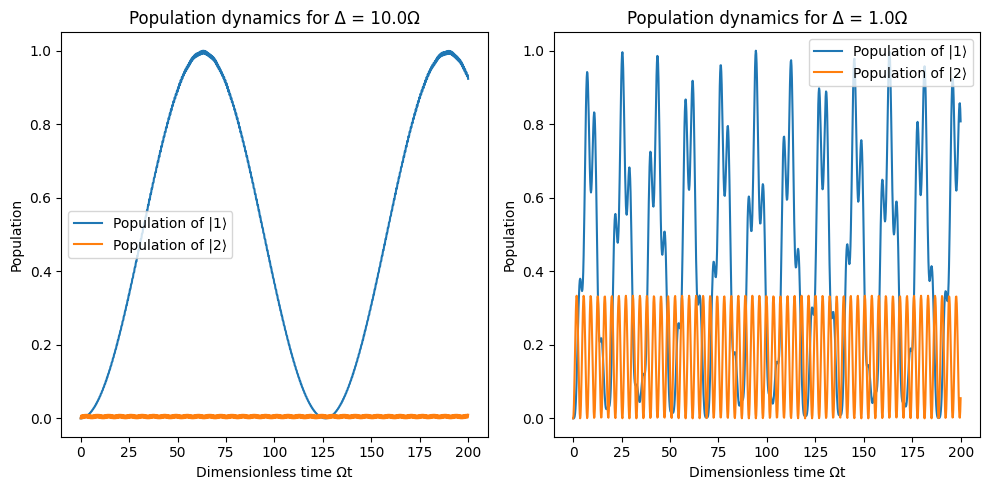

In [21]:
# Define constants
Omega = 1.0  # Rabi frequency
# Define the detuning for two cases
Delta_values = [10 * Omega, Omega] 

# Define the function that computes the hamiltonian
def Hamiltonian_I(Omega, Delta):
    ''' Defines and computes the Hamiltonian matrix in the interaction picture given the value of omega and delta'''
    return np.array([
        [0, 0, Omega / 2],
        [0, 0, Omega / 2],
        [Omega / 2, Omega / 2, Delta]
    ])

# Define initial state: |0> = [1, 0, 0]
psi_0 = np.array([1, 0, 0])
# Plot results for two different detunings
t_max = 200  # Omega * t up to 200
num_points = 1000
# Define the linspace for the time evolution from time 0 up to tome t max
times = np.linspace(0, t_max, num_points)

# Define time evolution function
def time_evolution(Omega: float, Delta: float):
    # Holds the population of the state |1>
    populations_1 = np.zeros(num_points)
    # Holds the population of the state |2>
    populations_2 = np.zeros(num_points) 
    # Iterate over each time step and compute the populations
    for i,t in enumerate(times):
        H_I = Hamiltonian_I(Omega, Delta)
        # Evolution operator U = exp(-iHt)
        U_t = scipy.linalg.expm(-1j * H_I * t)
        psi_t = np.dot(U_t, psi_0)
        # Compute populations: |<1|psi(t)>|^2 and |<2|psi(t)>|^2
        populations_1[i] = np.abs(psi_t[1]) ** 2
        populations_2[i] = np.abs(psi_t[2]) ** 2

    return times, populations_1, populations_2

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the populations for the delta values 
for i, Delta in enumerate(Delta_values):
    times, populations_1, populations_2 = time_evolution(Omega, Delta)
    axs[i].plot(times * Omega, populations_1, label='Population of |1⟩')
    axs[i].plot(times * Omega, populations_2, label='Population of |2⟩')
    axs[i].set_title(f'Population dynamics for Δ = {Delta / Omega}Ω')
    axs[i].set_xlabel('Dimensionless time Ωt')
    axs[i].set_ylabel('Population')
    axs[i].legend()

plt.tight_layout()
plt.show()


## 6
Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

$$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$

For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is

$$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$

where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that

$$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      

Now specialise to a driven qubit with Hamiltonian

$$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

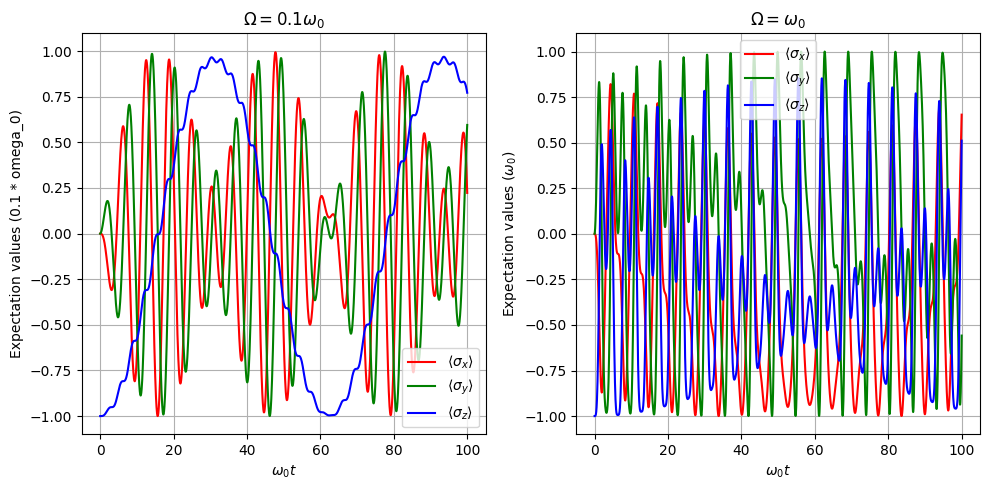

In [22]:
# Parameters
omega_0 = 1.0 # Let omega = 1, for convenience 
omega_d = 0.99 * omega_0
Delta_t = 0.05 / omega_0
Omega = 0.1 * omega_0  # or Omega = omega_0 for second case
T_max = 100 / omega_0
timesteps = int(T_max / Delta_t)

# Initial state |down>
psi = np.array([0, 1], dtype=complex)

def H(t: float, Omega: float, omega_d: float):
    ''' Function that computes the Hamiltonian for the driven qubit at time t '''
    H_z = 0.5 * omega_0 * sigma_z
    H_x = Omega * np.sin(omega_d * t) * sigma_x
    return H_z + H_x

def evolveState(omega: float, init: np.array):
    ''' Evolves the state of the initial vector '''
    # Create the initial state psi
    psi = init
    # Create the arrange of time interval from 0 up to t max with step delta_t
    times = np.arange(0, T_max, Delta_t)
    # Crete the arrays that will holds the expectation value of the sigma operators
    sigma_x_exp, sigma_y_exp, sigma_z_exp = [], [], []
    # Iterate over the time intervals to compute the expectation values
    for t in times:
        # Compute the Hamiltonian at time t
        H_t = H(t, omega, omega_d)
        # Compute the time evolution operator
        U = scipy.linalg.expm(-1j * Delta_t * H_t)
        # Evolve the state
        psi = np.dot(U, psi)
        # Calculate expectation values
        sigma_x_exp.append(np.vdot(psi, np.dot(sigma_x, psi)).real)
        sigma_y_exp.append(np.vdot(psi, np.dot(sigma_y, psi)).real)
        sigma_z_exp.append(np.vdot(psi, np.dot(sigma_z, psi)).real)
    return times, sigma_x_exp, sigma_y_exp, sigma_z_exp

# First compute the evolved state for the initial state psi and the value of omega set to 0.1w_0
times_1, sx_1, sy_1, sz_1 = evolveState(Omega, psi)
# Now compute the evolved state for the initial state psi and the value of omega set to w_0 = 1
times_2, sx_2, sy_2, sz_2 = evolveState(1, psi)
# Plot the results

# Create a figure with two subplots in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
a0,a1 = axes

# Plot the results for Omega = 0.1 * omega_0 in the first subplot
a0.plot(times_1 * omega_0, sx_1, label=r'$\langle \sigma_x \rangle$', color='red')
a0.plot(times_1 * omega_0, sy_1, label=r'$\langle \sigma_y \rangle$', color='green')
a0.plot(times_1 * omega_0, sz_1, label=r'$\langle \sigma_z \rangle$', color='blue')
a0.set_xlabel(r'$\omega_0 t$')
a0.set_ylabel('Expectation values (0.1 * omega_0)')
a0.legend()
a0.grid(True)
a0.set_title(r'$\Omega = 0.1 \omega_0$')

# Plot the results for Omega = omega_0 in the second subplot
a1.plot(times_2 * omega_0, sx_2, label=r'$\langle \sigma_x \rangle$', color='red')
a1.plot(times_2 * omega_0, sy_2, label=r'$\langle \sigma_y \rangle$', color='green')
a1.plot(times_2 * omega_0, sz_2, label=r'$\langle \sigma_z \rangle$', color='blue')
a1.set_xlabel(r'$\omega_0 t$')
a1.set_ylabel('Expectation values ($\omega_0$)')
a1.legend()
a1.grid(True)
a1.set_title(r'$\Omega = \omega_0$')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()